In [155]:
#imports
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.io as pio
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#importing datasets
music_data = pd.read_csv("music_genre.csv")
df = music_data.copy(deep=True)

#makes theme dark for all ploty visuals
pio.templates.default = "plotly_dark"





#dropping irrelevent columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

In [156]:
#creating dummy variables for categorical variables
dummies = pd.get_dummies(df["key"])
df["A"] = dummies["A"]
df["B"] = dummies["B"]
df["C"] = dummies["C"]
df["D"] = dummies["D"]
df["E"] = dummies["E"]
df["F"] = dummies["F"]
df["G"] = dummies["G"]
df["A#"] = dummies["A#"]
df["C#"] = dummies["C#"]
df["D#"] = dummies["D#"]
df["F#"] = dummies["F#"]
df["G#"] = dummies["G#"]
df.drop("key", axis = 1, inplace = True)

dummies = pd.get_dummies(df["mode"])
df["Major"] = dummies["Major"]
df["Minor"] = dummies["Minor"]
df.drop("mode", axis = 1, inplace = True)

dummies = pd.get_dummies(df["music_genre"])
df["Electronic"] = dummies["Electronic"]
df["Anime"] = dummies["Anime"]
df["Jazz"] = dummies["Jazz"]
df["Alternative"] = dummies["Alternative"]
df["Country"] = dummies["Country"]
df["Rap"] = dummies["Rap"]
df["Blues"] = dummies["Blues"]
df["Rock"] = dummies["Rock"]
df["Classical"] = dummies["Classical"]
df["Hip-Hop"] = dummies["Hip-Hop"]
df.drop("music_genre", axis = 1, inplace = True)

In [157]:
genre_list = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
target = pd.get_dummies(dummies)
input_columns = df.iloc[:,:-10]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#use_label_encoder=False, eval_metric='mlogloss'
model = XGBClassifier(booster='gbtree')
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy: ", accuracy)

total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

Overall Accuracy:  0.5002
Alternative    0.0823
Anime          0.0330
Blues          0.0597
Classical      0.0256
Country        0.0643
Electronic     0.0521
Hip-Hop        0.1026
Jazz           0.0708
Rap            0.0991
Rock           0.0769
dtype: float64


<AxesSubplot:>

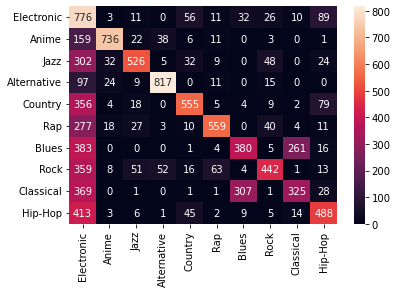

In [158]:
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
sns.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)